In [1]:
#Importando pacotes que serão utilizados para a resolução do exercício
import numpy as np

import networkx as ntx
from networkx.algorithms import tree

import matplotlib.pyplot as plt
import pandas as pd

import random
from itertools import combinations
from math import comb

A soma dos graus de todos os vértices de um grafo G é duas vezes o número de arestas
Dado o grafo $G(V,E)$
$$
\sum_{v \in V}{G(v)} = 2 . |E|
$$

Se queremos que $ |E| = 2|N| $, então, um grafo com todos os vértices de mesmo grau $degree(G)$:

$$
|N|degree(G) = 2 . 2|N|

\implies degree(G) = 4
$$

Para facilitar o processo de criação de grafos aleatórios, irá ser considerado que cada vértice possui um grau maior que $4$

In [2]:
def get_distance(x1,x2,y1,y2):
    """
    Retorna distância euclidiana dado dois pontos (x1,y1) e (x2,y2)
    """
    dist = ((x1 - x2)**2 + (y1- y2)**2)**(1/2)
    return dist

def generate_random_graph(n, max_degree, seed=10):
    """
    Entrada
    ----------
    n (int):                Número de vértices do grafo
    max_degree (int) [4,n]: Maior grau possível de cada vértice
    seed (int):             Semente do gerador random
    ----------
    Saída:
    G: Grafo                Grafo gerado
    ----------
    """
    #Gera erro caso o grau esperado seja maior que o número de nós do grafo
    if(max_degree > n):
        raise Exception("O grau máximo deve ser menor que o número de vértices")

    #Atribui uma seed para o random
    random.seed(seed)

    #Gera uma lista aleatória com o grau esperado para cada nó, variando no intervalo [4 , max_degree]
    expected_degree = [random.randint(4,max_degree) for _ in range(n)]
    G = ntx.expected_degree_graph(expected_degree, seed=None, selfloops=False)

    #Transforma em um grafo não orientado
    ntx.to_undirected(G)

    #Atribui uma coordenada aleatória para cada vértice, simulando a latitude e longitude pos = (x,y)
    for node in ntx.nodes(G):
        ntx.set_node_attributes(G,{node:{"pos":(random.uniform(0,5),random.uniform(0,5))}})
         
    #Atribui um peso a cada aresta
    for edge in ntx.edges(G):
        ntx.set_edge_attributes(G,{edge:{"weight":round(get_distance(G.nodes[edge[0]]['pos'][0], G.nodes[edge[1]]['pos'][0], G.nodes[edge[0]]['pos'][1], G.nodes[edge[1]]['pos'][1]),2)}})        
    return G

def prim(G):
  """
  Função retorna a árvore geradora mínima utilizando o algoritimo de Prim
  Retorna as arestas que devem ser conectadas para que a distância total seja mínima
  """
  E = tree.minimum_spanning_edges(G, algorithm="prim", data=False)
  edges = list(E)
  sorted_edges = sorted(sorted(x) for x in edges)
  return sorted_edges

def draw_graph(
    G,
    has_edgeslabel = False,
    edgelist=[],
    title = ''
    ):
    """
    Entrada
    --------
    G:                            Grafo a ser desenhado
    has_edgeslabel (Boolean):     Booleano que determina se as arestas dos grafos possuem labels
    edgelist:                     Lista com as arestas que deseja desenhar
    title (str):                  Titulo da imagem gerada
    
    Saída
    --------
    None    
    """
    f,ax = plt.subplots(figsize=(8,6))
    
    #Gera uma lista de coordenadas x e y com a posição de cada vértice
    pos = ntx.get_node_attributes(G,'pos')
    x = []
    y = []
    for i in range(len(pos)):
        x.append(pos[i][0])
        y.append(pos[i][1])

    #Desenha as arestas de acordo com o problema
    if not has_edgeslabel:
        ntx.draw_networkx_edges(G, pos=pos, edge_color='dimgray',alpha=0.35)
    else:
        edge_labels = dict([((tuple(e1), G[e1[0]][e1[1]]["weight"]))
                    for e1 in edgelist])
        ntx.draw_networkx_edges(G,pos=pos, edgelist=edgelist, edge_color='r', label='weight')
        ntx.draw_networkx_edge_labels(G, pos, edge_labels, rotate = True, font_size = 8)
    sc = plt.scatter(x,y,edgecolor={'black'})

    #Adiciona o nome em cima de cada vértice
    eps=0.04
    if not has_edgeslabel:
        for i, txt in enumerate(range(len(pos))):
            plt.annotate(txt, (x[i]+eps, y[i]+eps))

    #Configurações do matplotlib
    plt.title(title)    
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    ax.grid(True)

    plt.show()

def get_random_list_of_edges(n):
    """
    Gera n combinações de arestas (Excluindo self-loops)
    """
    if comb(n,2) < n*3:
        return list(combinations(range(n), r = 2))
    else:
        return random.sample(list(combinations(range(n), r = 2)),3*n)

Gerando mapa de cidade, com posições aleatórias

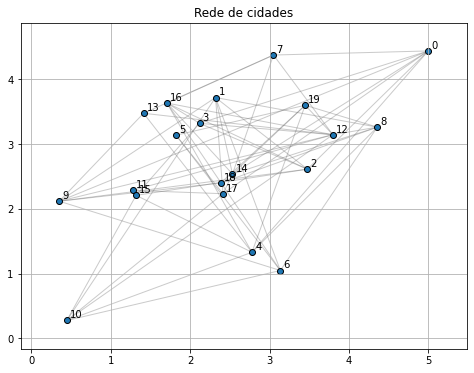

In [5]:
#Dados iniciais para gerar o grafo aleatório
n = 20
n_max_arestas = 8

#---------------------------------
G = generate_random_graph(n, n_max_arestas, seed=10)
draw_graph(G, title='Rede de cidades')

#Gera 3n arestas possíveis
g_random_edges = get_random_list_of_edges(n)

#Calcula a distância mínima para ir de uma cidade aleatória A para uma cidade aleatória B
min_distance = []
for edge in g_random_edges:
    min_distance.append({"edge":edge,"min_dist":ntx.dijkstra_path_length(G,edge[0],edge[1],weight='weight')})
    

In [6]:
results = pd.DataFrame(min_distance)
results.head()

,edge,min_dist
0,"(16, 17)",1.70
1,"(6, 11)",4.69
2,"(2, 9)",3.16
3,"(11, 12)",2.67
4,"(6, 14)",3.88


In [7]:
#Aplicando o método de dijkstra
random_edge_list= get_random_list_of_edges(n)

min_distance = []
for edge in random_edge_list:
    res = round(ntx.dijkstra_path_length(G,edge[0], edge[1],weight='weight'),2)
    min_distance.append(res)
    if not G.has_edge(edge[0], edge[1]):
        G.add_edge(edge[0], edge[1], weight = round(res,2))

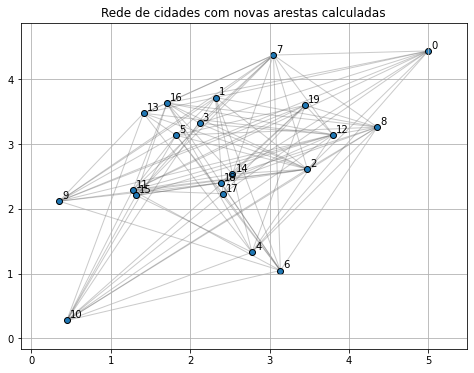

In [8]:
draw_graph(G,title = "Rede de cidades com novas arestas calculadas")

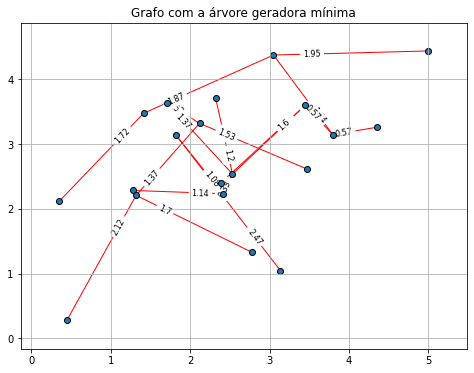

In [17]:
E = prim(G)
draw_graph(G, has_edgeslabel = True, edgelist=E,title="Grafo com a árvore geradora mínima")

In [38]:
def get_total_edge_weight(G):
    total = 0
    for ed in G.edges:
        total += G.get_edge_data(ed[0], ed[1])['weight']
    return total

In [46]:
#Iterador que percorre as possíveis árvores geradoras
#total_array => Lista com os total calculado de cada árvore geradora

treeIterator = ntx.algorithms.tree.mst.SpanningTreeIterator(G)
stop = 0
Grafos = []
total_array = []

for tree in treeIterator:
    total_array.append(get_total_edge_weight(tree))
    if(stop > 200):
        break
    stop += 1

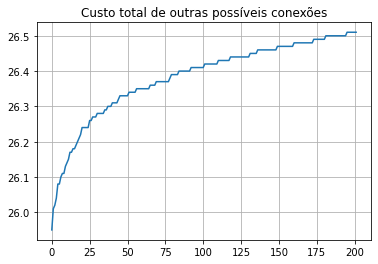

In [48]:
fig, ax = plt.subplots()

plt.plot(np.arange(len(total_array)), total_array)
ax.grid(True)
plt.title("Custo total de outras possíveis conexões")
plt.show()